In [39]:
# load data
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('../dataset/house_price_data.csv', delimiter=',')
areas = list(data[1:,0])
prices = list(data[1:,1])

data_size = len(areas)

print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

areas:  [6.7, 4.6, 3.5, 5.5]
prices:  [9.1, 5.9, 4.6, 6.7]
data_size:  4


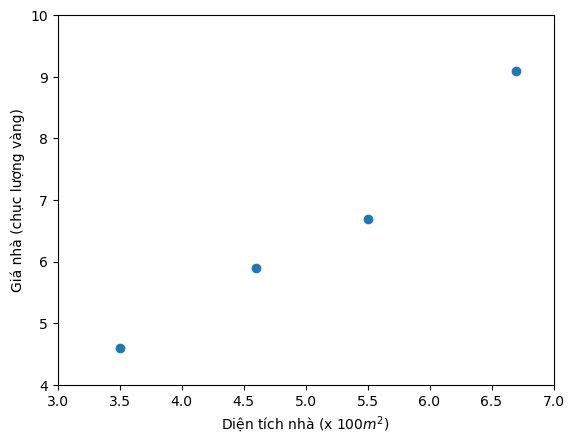

In [40]:
# Naive implementation
plt.scatter(areas, prices)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

<img src="../md_img/1.png" width="350" height="250">

In [41]:
# forward
def predict(x,w,b):
    return x*w+ b

# compute gradient 
def gradient(z,y,x):
    dw = 2*x*(z-y)
    db = 2*(z-y)
    return (dw, db)

# update weights
def update_weight(w,b,n,dw,db):
    w_new = w - n*dw
    b_new = b - n*db
    return (w_new, b_new)

In [42]:
# init weights
b = 0.04
w = -0.34
n = 0.01

# how long 
epoch_max = 10
# losses
losses = []


for epoch in range(epoch_max):
    for i in range(data_size):
        # get a sample
        x = areas[i]
        y = prices[i]
        print('sample: ', x, y)

        # predict z
        z = predict(x,w,b)
        print('z: ', z)

        # compute loss
        loss = (z-y)*(z-y)
        print('Loss: ', loss)
        

        # compute gradient
        (dw, db) = gradient(z,y,x)
        print('dw: ', dw)
        print('db: ', db)

        # update weights
        (w, b) = update_weight(w,b,n,dw,db)
        print('w_new: ', w)
        print('b_new: ', b)
        print('-----')
        losses.append(loss)

sample:  6.7 9.1
z:  -2.238
Loss:  128.550244
dw:  -151.92919999999998
db:  -22.676
w_new:  1.1792919999999998
b_new:  0.26676
-----
sample:  4.6 5.9
z:  5.691503199999998
Loss:  0.04347091561024104
dw:  -1.9181705600000227
db:  -0.41699360000000496
w_new:  1.1984737056
b_new:  0.27092993600000004
-----
sample:  3.5 4.6
z:  4.4655879056000005
Loss:  0.018066611120994277
dw:  -0.9408846607999939
db:  -0.26882418879999825
w_new:  1.2078825522080001
b_new:  0.273618177888
-----
sample:  5.5 6.7
z:  6.9169722150320005
Loss:  0.04707694209589261
dw:  2.386694365352004
db:  0.43394443006400074
w_new:  1.1840156085544802
b_new:  0.26927873358736004
-----
sample:  6.7 9.1
z:  8.202183310902377
Loss:  0.8060748072222165
dw:  -12.030743633908138
db:  -1.7956333781952445
w_new:  1.3043230448935617
b_new:  0.2872350673693125
-----
sample:  4.6 5.9
z:  6.287121073879696
Loss:  0.14986272584176885
dw:  3.5615138796932007
db:  0.7742421477593915
w_new:  1.2687079060966298
b_new:  0.27949264589171857


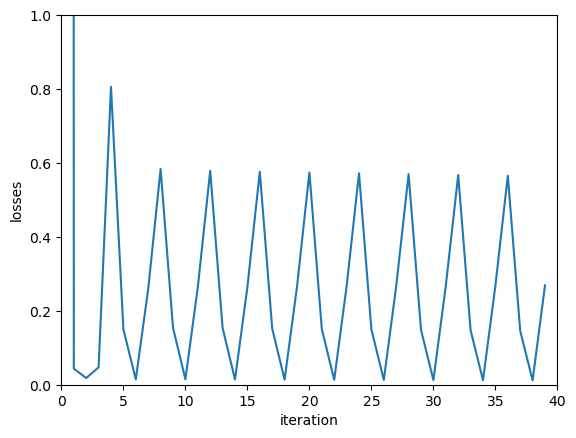

In [43]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.xlim(0,40)
plt.ylim(0,1)
plt.show()